## Load Libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import scipy.io
import mne
import glob
from mne import Epochs,find_events

plt.rcParams['figure.figsize'] = 14, 4 
from preproc import data_extract,set_info, bp_filter, epochs_gen

## Load Data

In [2]:
# Importing the dataset
filepath = "/workspace/data/EEG/data/BNCI/"
df = glob.glob(filepath + '*.mat')

#a = np.ones(10)
df

['/workspace/data/EEG/data/BNCI/A01.mat',
 '/workspace/data/EEG/data/BNCI/A02.mat',
 '/workspace/data/EEG/data/BNCI/A03.mat',
 '/workspace/data/EEG/data/BNCI/A05.mat',
 '/workspace/data/EEG/data/BNCI/A04.mat',
 '/workspace/data/EEG/data/BNCI/A06.mat',
 '/workspace/data/EEG/data/BNCI/A07.mat',
 '/workspace/data/EEG/data/BNCI/A08.mat']

In [3]:
df1 = scipy.io.loadmat(df[0])
df2 = scipy.io.loadmat(df[1])
df3 = scipy.io.loadmat(df[2])
df4 = scipy.io.loadmat(df[3])
df5 = scipy.io.loadmat(df[4])
df6 = scipy.io.loadmat(df[5])
df7 = scipy.io.loadmat(df[6])
df8 = scipy.io.loadmat(df[7])

## Data extraction

In [4]:
channels, X, y, y_stim, trial, classes, classes_stim, gender, age, ALSfrs, onsetALS = data_extract(df1)
raw = set_info(X,channels, sfreq = 256)

Creating RawArray with float64 data, n_channels=8, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.


## Plot Y values

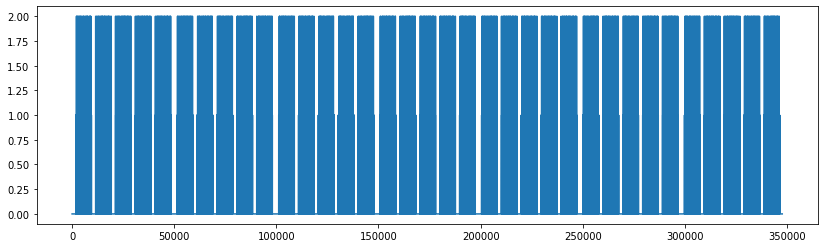

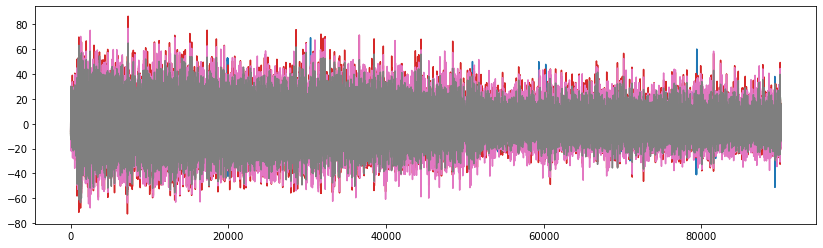

In [5]:
plt.plot(y)
plt.figure()
plt.plot(X[10000:100100])

In [ ]:
'''
sfreq = 256
f_low = 0.1
f_high = 15
# b, a = butter(5,[low,high],btype = 'band', fs = 256)
# X = lfilter(b, a, X)

info = mne.create_info(channels, sfreq, ch_types = ["eeg"]*8)
raw = mne.io.RawArray(X.T, info)
raw.set_montage("standard_1020")

#raw.plot(duration=5, n_channels=8)
'''

## Plot raw data

Using matplotlib as 2D backend.


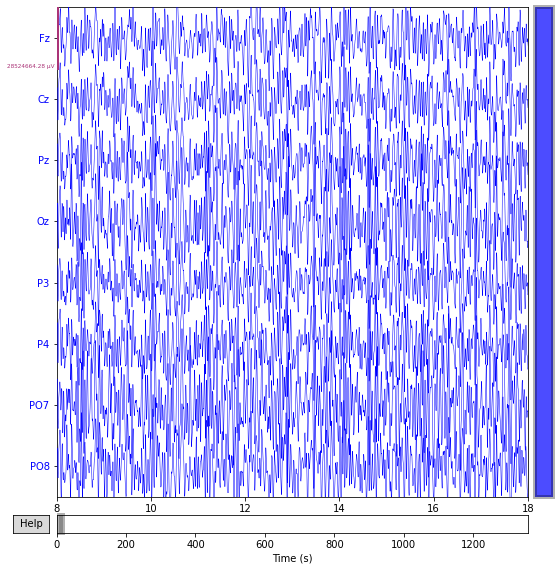

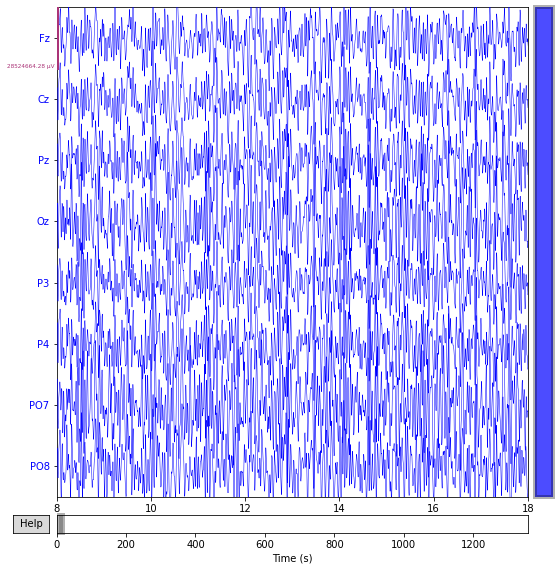

In [6]:
raw.plot(color = 'blue', scalings= 'auto',duration =10 ,start = 8, title = "Raw EEG signals", show_scalebars=True, show_scrollbars=True)

## Join dataframes

In [7]:
jdf = [df1, df2, df3, df4, df5, df6, df7, df8]

## Filter and Epochs generation

In [8]:
filt_raw = []
epochs = []
for i in range(len(jdf)):
    #filt_raw[i] = bp_filter(jdf[i])
    filt_raw.append(bp_filter(jdf[i]))
    #events.append(find_events(filt_raw[i]))
    epochs.append(epochs_gen(filt_raw[i]))


Creating RawArray with float64 data, n_channels=8, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 32 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB

4200 events found
Event IDs: [1 2]
Not setting metadata
Not setting metadata
4200 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 4200 events and 257 original time points ...
0 bad epochs dropped
Creating RawArray with float64 data, n_channels=8, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.
Creating RawArray with float64 data, 

In [10]:
filt_raw1 = filt_raw[0]
filt_raw2 = filt_raw[1]
filt_raw3 = filt_raw[2]
filt_raw4 = filt_raw[3]
filt_raw5 = filt_raw[4]
filt_raw6 = filt_raw[5]
filt_raw7 = filt_raw[6]
filt_raw8 = filt_raw[7]

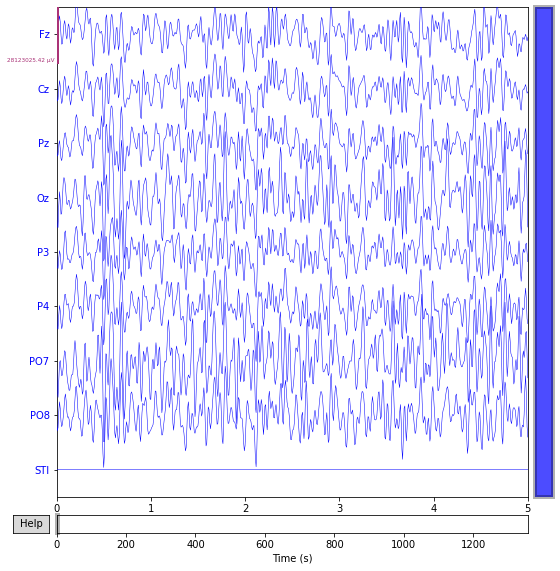

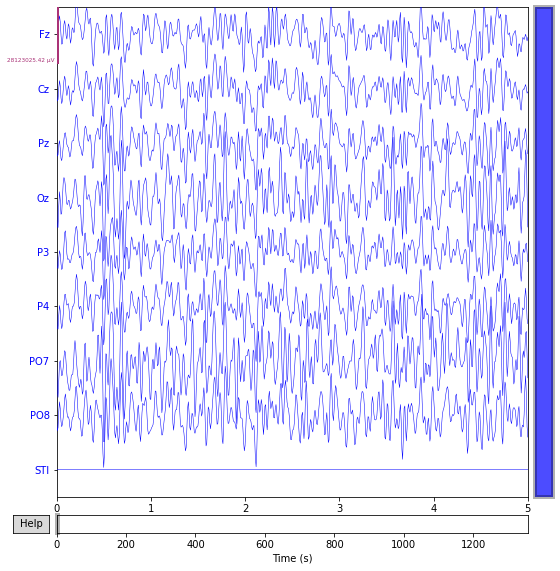

In [11]:
filt_raw1.plot(duration =5 ,color = 'blue', scalings = 'auto')


## Event matrix

In [ ]:
events = find_events(filt_raw1)
events

In [24]:
event_id = dict(non_target_stim = 1, target_stim = 2)

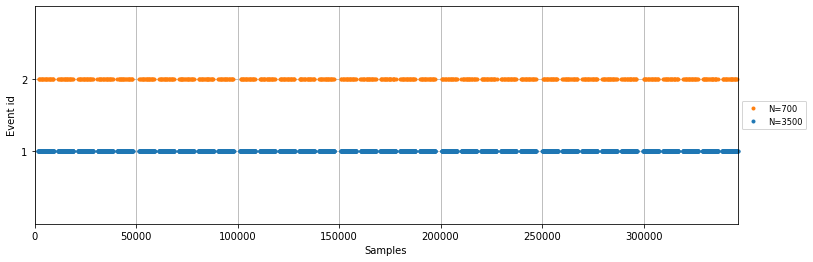

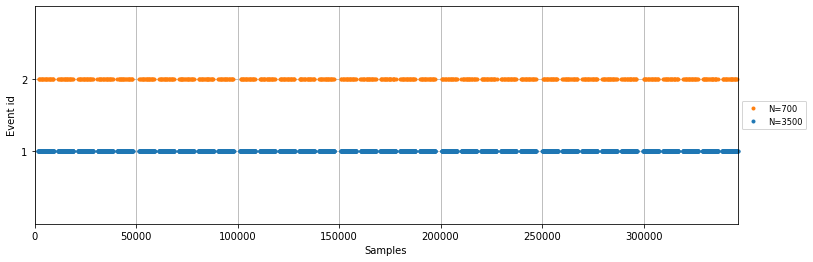

In [17]:
mne.viz.plot_events(events)

## Plot filtered data with events

In [ ]:
filt_raw1.plot(events = events, duration =10 ,start = 8, color = 'blue', scalings = 'auto')


In [22]:
epochs1 = epochs[0]
epochs2 = epochs[1]
epochs3 = epochs[2]
epochs4 = epochs[3]
epochs5 = epochs[4]
epochs6 = epochs[5]
epochs7 = epochs[6]
epochs8 = epochs[7]


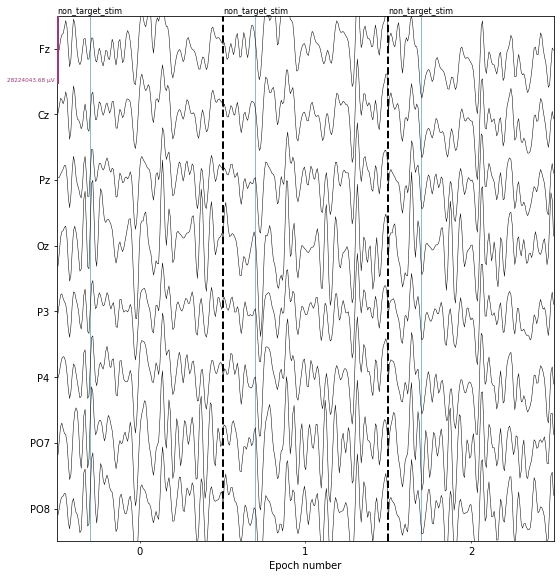

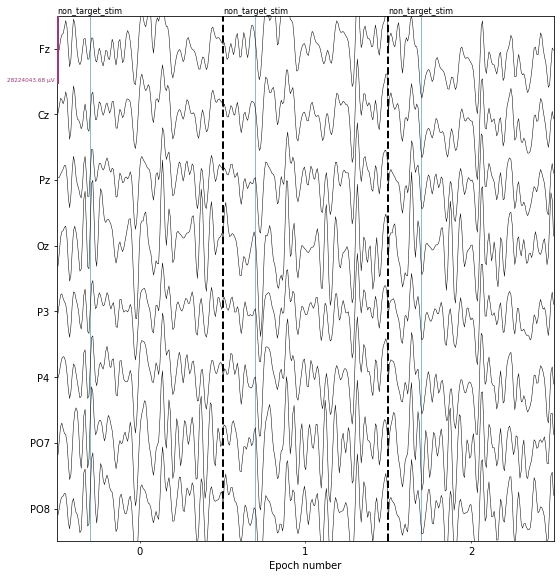

In [25]:
epochs1.plot(picks='eeg', show_scrollbars=False, events = events,
                      event_id=event_id, n_epochs = 5, scalings = 'auto')

# Butterfly plot

In [ ]:
mne.viz.plot_epochs(epochs1, picks='eeg', show_scrollbars=False, events = events,
                    n_epochs = 3, scalings = 'auto',
                    event_color = {1 : 'blue' , 2:'red'} )

In [ ]:
mne.viz.plot_epochs(epochs1, picks='eeg', show_scrollbars=False, events = events,
                    n_epochs = 3, scalings = 'auto', butterfly = True,
                   event_color = {1 : 'blue' , 2:'red'})

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


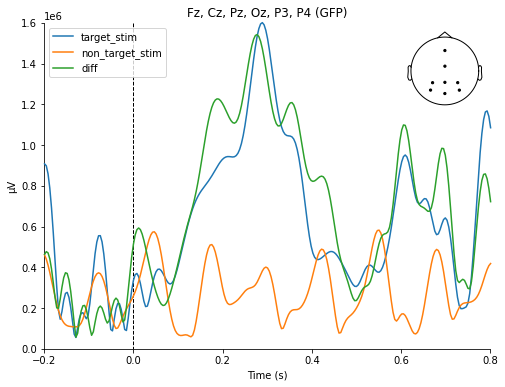

[<Figure size 576x432 with 2 Axes>]

In [30]:
evokeds = []

for trial_type in epochs.event_id:
    evokeds.append(epochs[trial_type].average())

evoked_diff = mne.combine_evoked([evokeds[1], evokeds[0]], weights=[1, -1])

mne.viz.plot_compare_evokeds(dict(target_stim = evokeds[1], non_target_stim = evokeds[0], diff = evoked_diff ),
                             legend='upper left', show_sensors='upper right', picks = picks)


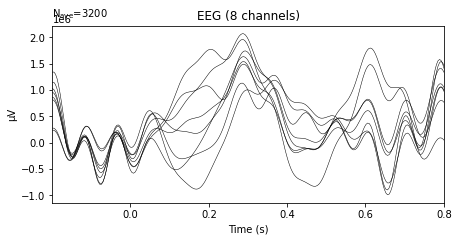

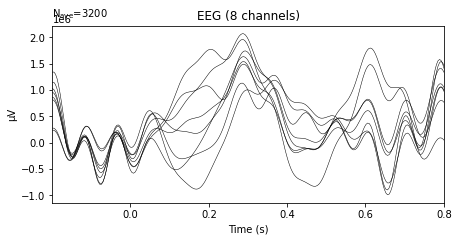

In [35]:
evokeds[1].plot()

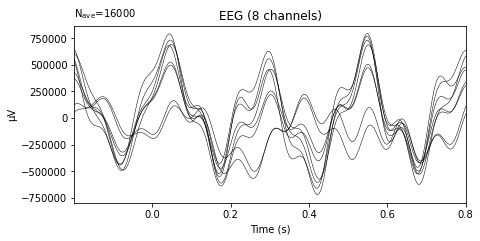

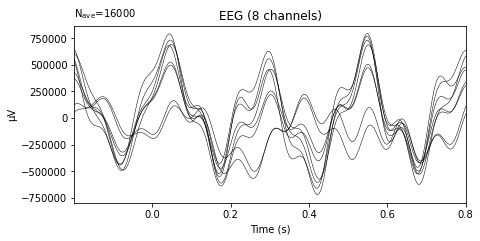

In [38]:
evokeds[0].plot()

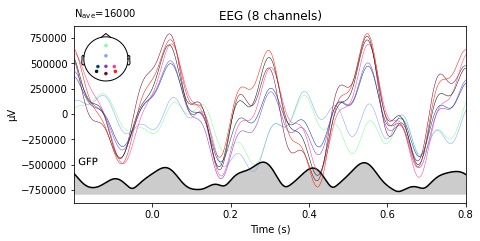

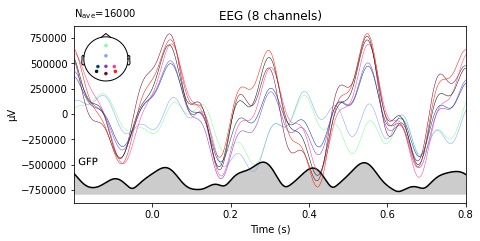

In [41]:
evokeds[0].plot(picks='eeg', spatial_colors=True, gfp=True)


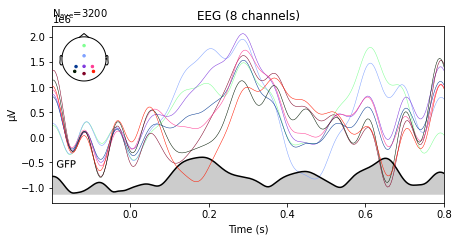

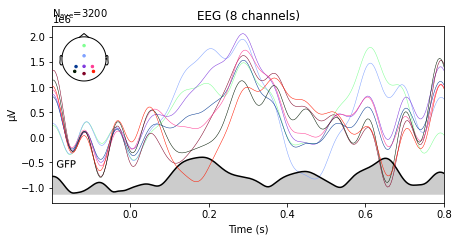

In [42]:
evokeds[1].plot(picks='eeg', spatial_colors=True, gfp=True)



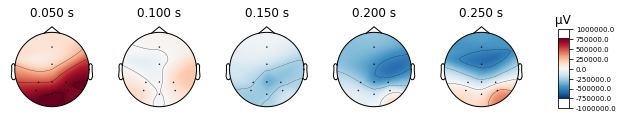

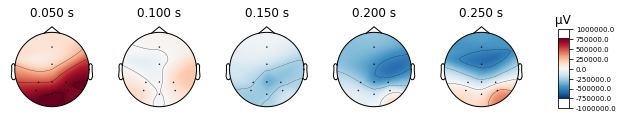

In [47]:
times = np.linspace(0.05, 0.25, 5)
evokeds[0].plot_topomap(ch_type='eeg', times=times, colorbar=True)

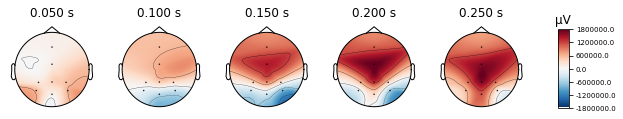

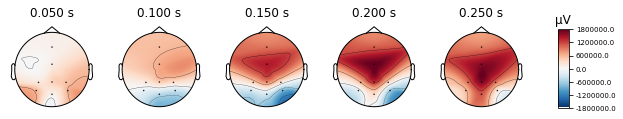

In [50]:
times = np.linspace(0.05, 0.25, 5)
evokeds[1].plot_topomap(ch_type='eeg', times=times, colorbar=True)

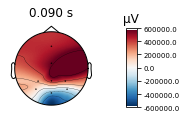

Text(0.5, 0.05, 'average from 40-140 ms')

In [54]:
fig = evokeds[1].plot_topomap(ch_type='eeg', times=0.09, average=0.1)
fig.text(0.5, 0.05, 'average from 40-140 ms', ha='center')

No projector specified for this dataset. Please consider the method self.add_proj.


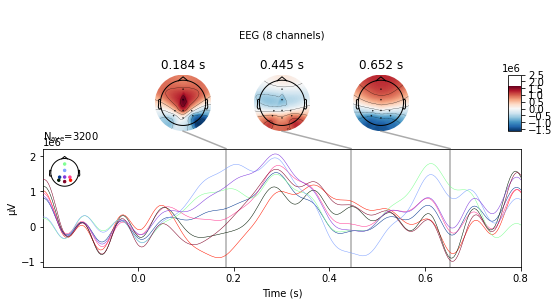

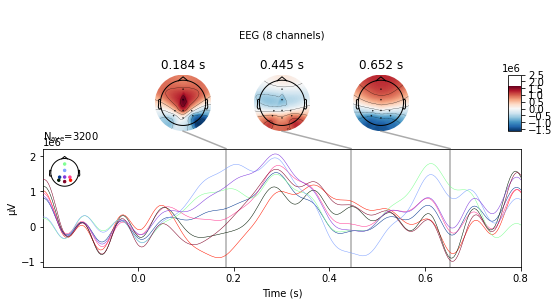

In [60]:
evokeds[1].plot_joint()


No projector specified for this dataset. Please consider the method self.add_proj.


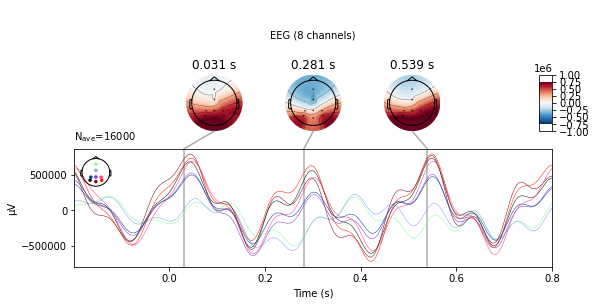

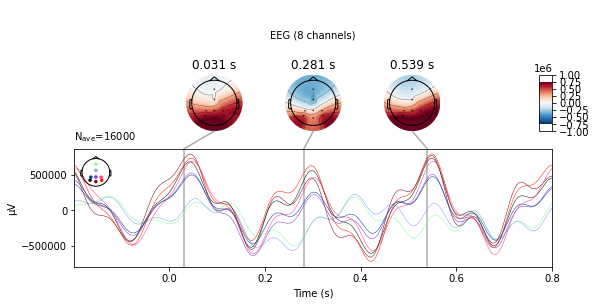

In [62]:
evokeds[0].plot_joint()



combining channels using "mean"


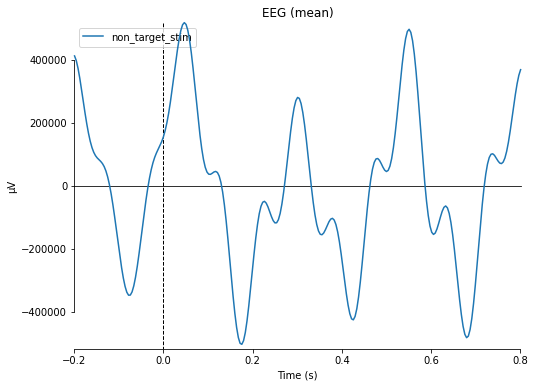

combining channels using "median"


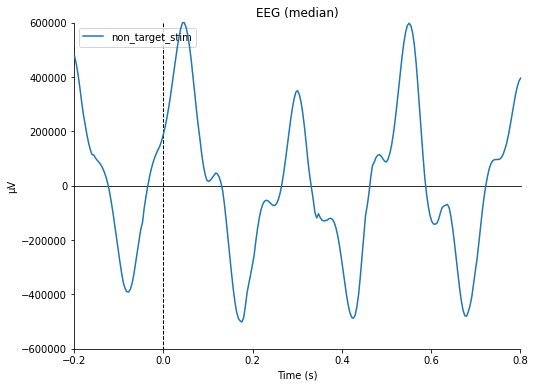

combining channels using "gfp"


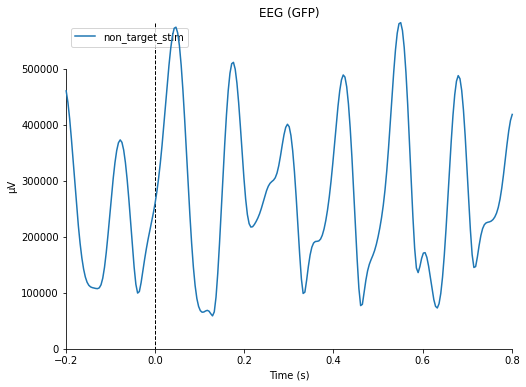

combining channels using "<function custom_func at 0x7fbca4c0b280>"


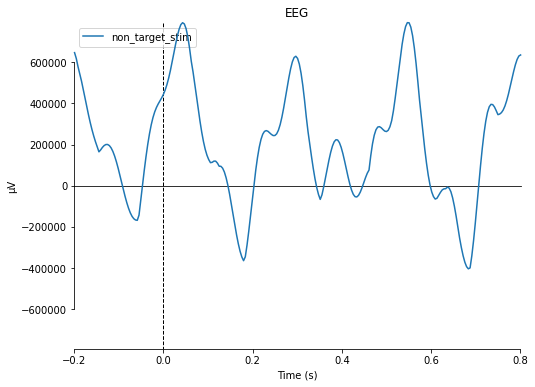

In [64]:
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evokeds[0], picks='eeg', combine=combine)

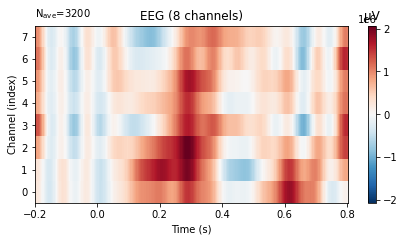

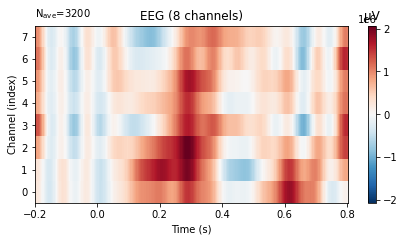

In [67]:
evokeds[1].plot_image(picks='eeg')

In [ ]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
ica = mne.preprocessing.ICA(n_components=8, random_state=13, max_iter=800)
ica.fit(raw)
ica.exclude = [1,2]  # details on how we picked these are omitted here
ica.plot_properties(raw, picks=ica.exclude)

In [ ]:
evokeds[0].plot()

In [ ]:
evokeds[1].plot()

## ICA

In [9]:
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)
ica = ICA(n_components=8, max_iter='auto', random_state=13)
ica.fit(filt_raw)
ica

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 1.3s.


<ICA | raw data decomposition, method: fastica (fit in 12 iterations on 347704 samples), 8 ICA components explaining 100.0 % of variance (8 PCA components available), channel types: eeg, no sources marked for exclusion>

Creating RawArray with float64 data, n_channels=8, n_times=347704
    Range : 0 ... 347703 =      0.000 ...  1358.215 secs
Ready.


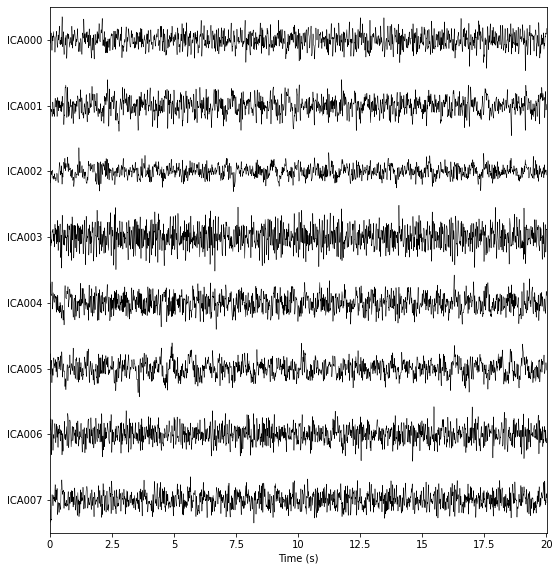

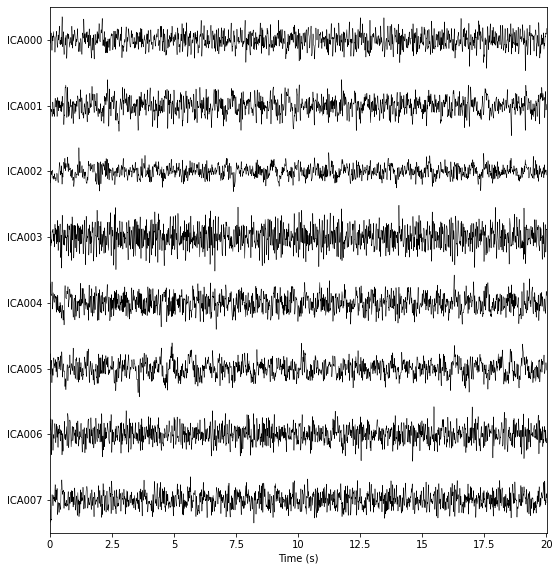

In [12]:
raw.load_data()
ica.plot_sources(raw, show_scrollbars=False)

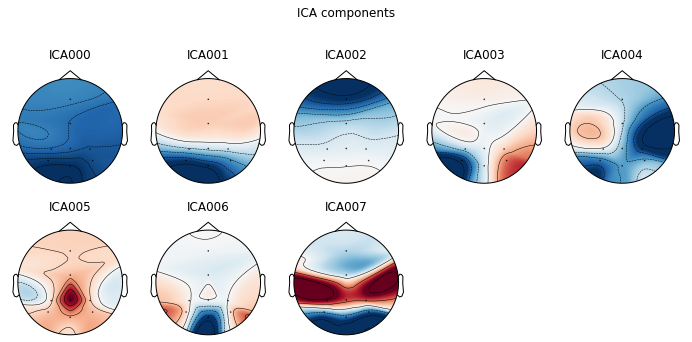

[<MNEFigure size 702x357.12 with 8 Axes>]

In [10]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 8 PCA components


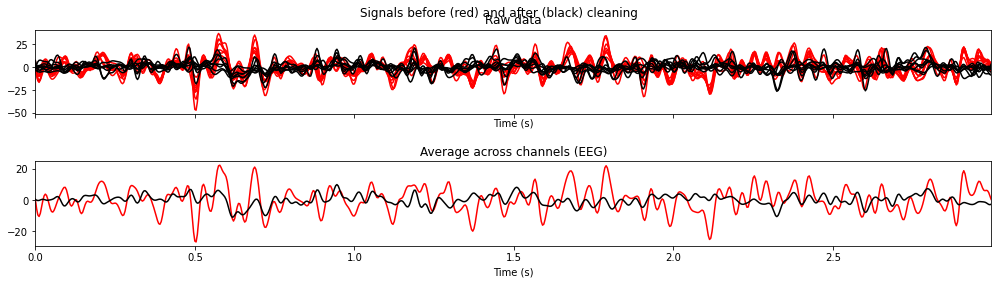

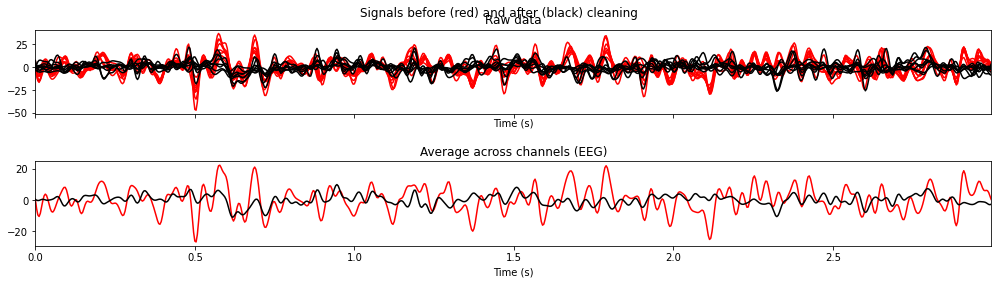

In [11]:
ica.plot_overlay(raw, exclude=[0], picks='eeg')


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
679

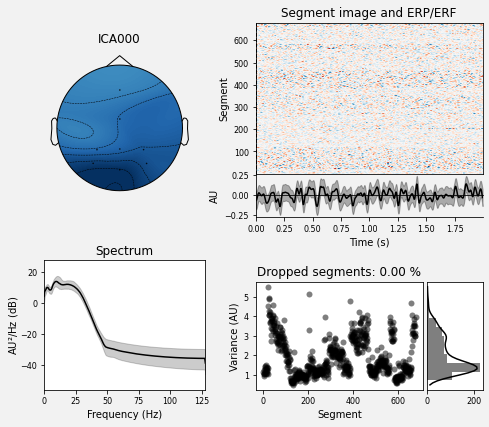

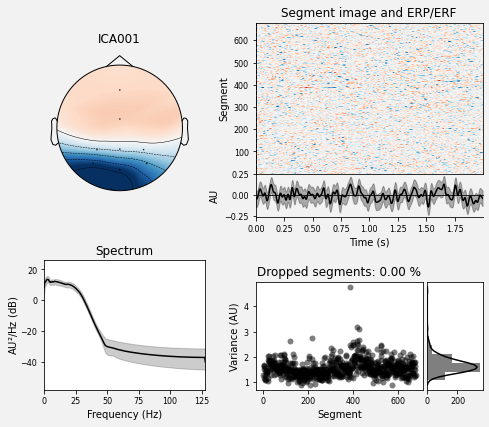

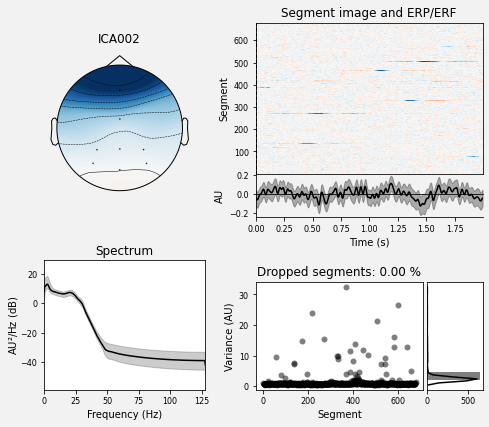

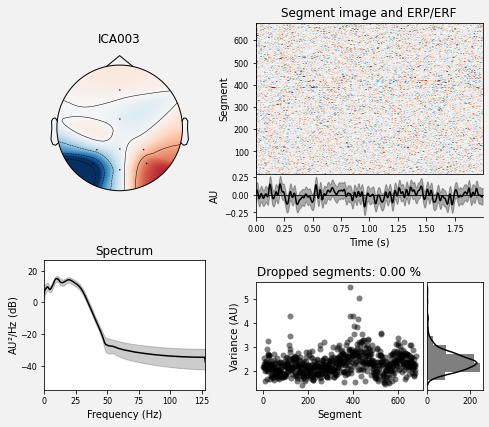

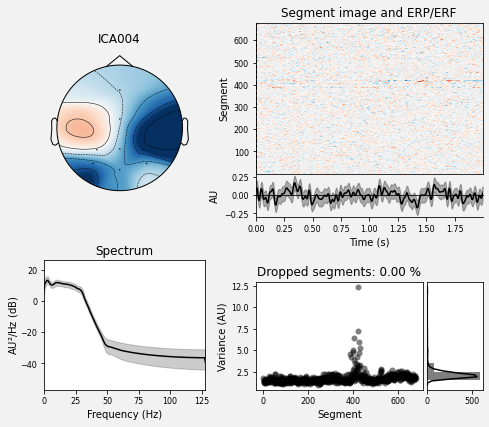

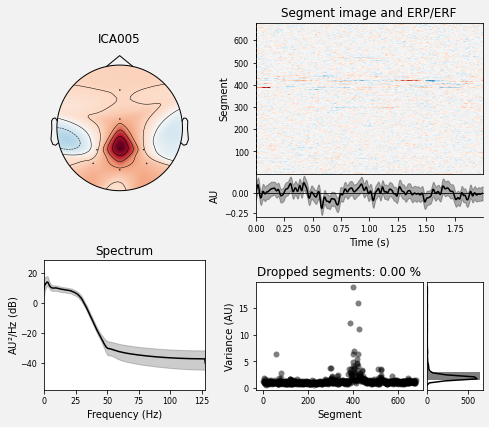

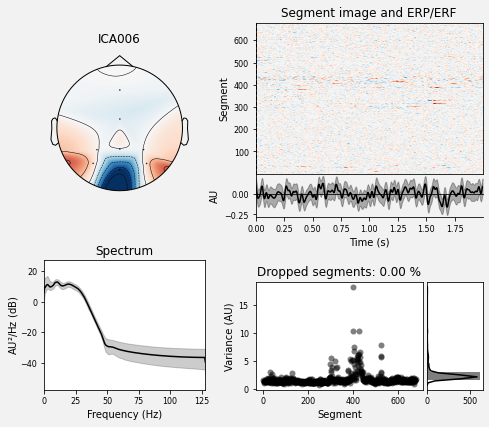

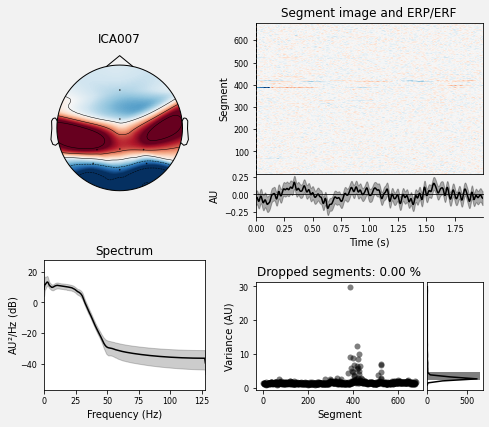

[<Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>,
 <Figure size 504x432 with 6 Axes>]

In [15]:
ica.plot_properties(raw, picks=[0, 1, 2, 3, 4, 5, 6, 7])


In [ ]:
from mne.preprocessing import ICA

raw.plot();
ica = ICA(n_components=8, method='fastica', random_state=23).fit(raw)
ica.exclude = [1]
raw_clean = ica.apply(raw.copy())

In [ ]:
ica.plot_components()

In [ ]:
ica.plot_sources(raw);

In [ ]:
ica.plot_properties(raw, picks=0)

In [ ]:
ica.plot_properties(raw, picks=1)

In [ ]:
raw.filter?